In [1]:
# importing required libraries and settings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import geopandas
pd.set_option('display.max_colwidth', None)

In [2]:
# Reading in data
df = pd.read_csv("crimeall.csv", sep = ',')
df.head(5)            # print dataframe sample


,PK,CCR,HIERARCHY,INCIDENTTIME,INCIDENTLOCATION,CLEAREDFLAG,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTHIERARCHYDESC,OFFENSES,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,2802309,16000001.0,10,2016-01-01T00:00:00,"400 Block North Shore DR Pittsburgh, PA 15212",Y,North Shore,1,HARRASSMENT/THREAT/ATTEMPT/PHY,2702 Aggravated Assault. / 2709(a) Harassment. / 3503.B1I DEF. TRESPASS ACTUAL COMMUNICATION,2205.0,1.0,6.0,-80.012337,40.446263
1,2803174,16004547.0,11,2016-01-01T00:01:00,"5400 Block Carnegie ST Pittsburgh, PA 15201",N,Upper Lawrenceville,2,THEFT BY DECEPTION,3922 Theft by Deception.,1011.0,7.0,2.0,-79.950295,40.482290
2,2801809,16000367.0,4,2016-01-01T00:10:00,"500 Block Mt Pleasant RD Pittsburgh, PA 15214",N,Northview Heights,1,DISCHARGE OF FIREARM INTO OCC.STRUCTURE,2707.1 Discharge of a Firearm into Occupied Structure,2609.0,1.0,1.0,-80.000966,40.478651
3,2802315,16000035.0,10,2016-01-01T00:15:00,"300 Block Wood ST Pittsburgh, PA 15222",Y,Golden Triangle/Civic Arena,2,HARRASSMENT/THREAT/ATTEMPT/PHY,2709(a)(3) Harassment No Legitimate Purpose,201.0,6.0,6.0,-80.001251,40.438918
4,2802312,16000024.0,4,2016-01-01T00:16:00,"500 Block Mt Pleasant RD Pittsburgh, PA 15214",N,Northview Heights,1,PROP MISSILE INTO OCC VEHICLE/OR ROADWAY,2705 Recklessy Endangering Another Person. / 3304 Criminal Mischief. / 2707.1 Discharge of a Firearm into Occupied Structure,2609.0,1.0,1.0,-80.000966,40.478651


In [3]:
df['INCIDENTNEIGHBORHOOD'].unique()             # show unique neighborhoods

array(['North Shore', 'Upper Lawrenceville', 'Northview Heights',
       'Golden Triangle/Civic Arena', 'South Side Flats', 'Elliott',
       'Homewood North', 'South Side Slopes', 'Carrick', 'South Oakland',
       nan, 'Bloomfield', 'Beechview', 'Bluff', 'Strip District',
       'Mount Washington', 'East Carnegie', 'Crafton Heights',
       'Marshall-Shadeland', 'East Liberty', 'East Allegheny',
       'Friendship', 'Arlington', 'Central Northside',
       'Spring Hill-City View', 'Brighton Heights', 'Westwood',
       'East Hills', 'Brookline', 'South Shore', 'Lower Lawrenceville',
       'Bedford Dwellings', 'Troy Hill-Herrs Island', 'Central Oakland',
       'Garfield', 'West End', 'West Oakland', 'Central Lawrenceville',
       'Lincoln-Lemington-Belmar', 'Sheraden', 'Beltzhoover',
       'Outside City', 'Squirrel Hill South', 'North Oakland',
       'Allentown', 'Perry North', 'Homewood South', 'Shadyside',
       'Manchester', 'Squirrel Hill North', 'Regent Square',
       'Hom

In [4]:
#I removed unneeded columns like: incident tract, council district, and etc.	

# The main idea is lower number of police incidents correlates to safety(my submetric), so I want to see each neighborhood's police incident count.
df_sub = df.INCIDENTNEIGHBORHOOD.value_counts()     # stores count of each unique value
df_reverse = df_sub.iloc[::-1]                      # reversing data frame to show from lowest value....a better way might exist
df_reverse.head(15)

Mt. Oliver Boro             87
Mt. Oliver Neighborhood    117
Outside County             189
Troy Hill-Herrs Island     252
Ridgemont                  264
Outside State              264
Chartiers City             271
New Homestead              290
East Carnegie              364
Swisshelm Park             372
Mount Oliver               432
Summer Hill                440
Arlington Heights          443
Regent Square              461
Hays                       473
Name: INCIDENTNEIGHBORHOOD, dtype: int64

In [5]:
# Mount Oliver appears 3 different times so there is something wrong with the dataset.
# Below removed series are sourced from the Official Designations from the City of Pittsburgh
df = df[df['INCIDENTNEIGHBORHOOD'] != 'Outside County']                 # This is not a Pittsburgh Neighborhood
df = df[df['INCIDENTNEIGHBORHOOD'] != 'Outside State']                  # This is not a Pittsburgh Neighborhood
df = df[df['INCIDENTNEIGHBORHOOD'] != 'Mt. Oliver Boro']                # This is not a Pittsburgh Neighborhood  ***Mt. Oliver is a 
                                                                        # Pittsburgh neighborhood, but Mt. Oliver Borough is not.***

# I merged Mount Oliver and Mt. Oliver Neighborhood, I checked the street addresses of them and they are in the same neighborhood. This error
# in the dataset might be due to Mt. Oliver Boro being included but not being a neighborhood a part of Pittsburgh. So perhaps some officers added 
# the "neighborhood" at the end to help clarify.
df = df.replace(to_replace = 'Mt. Oliver Neighborhood', value ='Mount Oliver')
# df                                             # testing purposes

In [6]:
# Showing neighbors again after removing the non-neighborhoods areas from data set
df_sub = df.INCIDENTNEIGHBORHOOD.value_counts()     # stores count of each unique value
df_reverse = df_sub.iloc[::-1]                      # reversing data frame to show from lowest value....a better way might exist
df_reverse                                          # showing the series after filtering through unneeded columns and rows

Troy Hill-Herrs Island         252
Ridgemont                      264
Chartiers City                 271
New Homestead                  290
East Carnegie                  364
                             ...  
Shadyside                     7136
Bloomfield                    7411
Carrick                       9766
Central Business District    14604
South Side Flats             15904
Name: INCIDENTNEIGHBORHOOD, Length: 94, dtype: int64

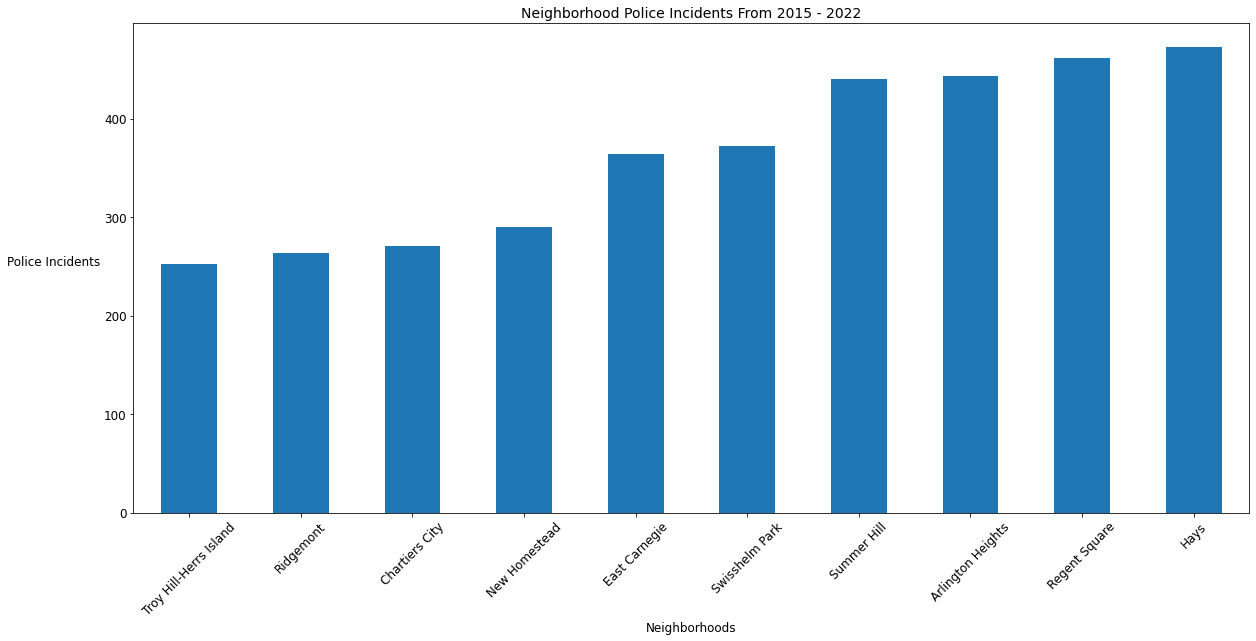

In [7]:
plt.rcParams["figure.figsize"] = [20,9]     # setting graph size or else it's too small
df_reverse10 = df_reverse.iloc[:10]         # show only first 10 neighborhoods
df_reverse10.plot.bar()                     # graphing our dataframe
plt.title("Neighborhood Police Incidents From 2015 - 2022", fontsize = 14)   # graph title
plt.xticks(fontsize = 12,rotation=45)       # rorate x-axis for readability
plt.xlabel("Neighborhoods", fontsize = 12)  # set x-axis label

plt.yticks(fontsize = 12)                   # rotate x-axis for readability
plt.ylabel("Police Incidents", fontsize = 12, rotation = 0, labelpad = 50)  # y-axis label, padding because it enters the graph body
plt.show()                                  # show graph more cleanly

# herrs island is part of troy hill neighborhood

##### Conclusion - Edward
This data set had over 277000 rows of data, each representing 1 police incident in a Pittsburgh neighborhood over the span of 7 years. I organized the data so that each neighborhood had a score(the number of police incidents). The lower the score, the safer the neighborhood is. In result, the Troy Hill-Herrs Island Neighborhood had the least amount of incidents, and therefore was the "best" neighborhood for my submetric. 

Something I'd like to mention is: the data set didn't have population density data. I think with a larger population, it is only natural for police incidents to go up. So I think this factor would also affect the information gained from this data set and even potentially become a shortcoming for this interpretation.

The data driven determination of the "best" neighbohood is different from my personal favorite. East Liberty is my personal favorite, simply because I live there.........although......definitely wouldn't recommend living here. Kinda dangerous at night. O.O

<function matplotlib.pyplot.show(close=None, block=None)>

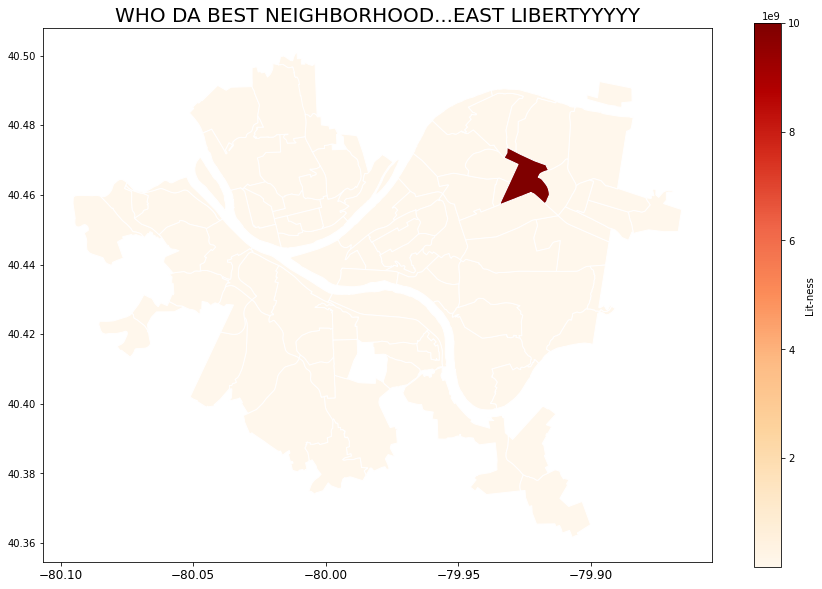

In [8]:
# Merge map with csv
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read shp
df_sub['East Liberty'] = 9999999999

df_merge = df_sub.rename_axis('INCIDENTNEIGHBORHOOD').to_frame('count')
steps_map = neighborhoods.merge(df_merge, how='left', left_on='hood', right_on='INCIDENTNEIGHBORHOOD')
steps_map.plot(column='count', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Lit-ness" }, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "white"} # set disctricts with no data to gray
               )
plt.title("WHO DA BEST NEIGHBORHOOD...EAST LIBERTYYYYY", fontsize = 20)   # graph title
plt.xticks(fontsize = 12,rotation=0)       # rorate x-axis for readability
plt.show